In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 200

In [27]:
df = pd.read_csv("cleaned_data.csv")
df["Date mutation"] = pd.to_datetime(df["Date mutation"], dayfirst=True)
df = df.set_index("Date mutation").sort_index()
sample = df.sample(1_000_000).sort_index()
# sample = df
display(df)
display(df.isna().sum())
display(df.dtypes)

/var/folders/fj/8pmdh2z120lbtvdmmc2407th0000gn/T/ipykernel_9953/456962181.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_data.csv")


,No disposition,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
Date mutation,,,,,,,,,,,,,,,,,,,
2018-01-02,1,Vente,1250000.0,RUE,Voie,DU DAUPHINE,26540.0,MOURS-SAINT-EUSEBE,26,218,AE,381,0,4.0,Local industriel. commercial ou assimilé,1105.0,0.0,T,3106.0
2018-01-02,1,Vente,127200.0,RUE,Voie,JEAN BAPTISTE LEBAS,59950.0,AUBY,59,28,A,2836,0,1.0,Maison,89.0,4.0,S,477.0
2018-01-02,1,Vente,121280.0,RUE,Voie,JULES FERRY,59450.0,SIN LE NOBLE,59,569,BC,516,0,1.0,Maison,74.0,4.0,S,176.0
2018-01-02,1,Vente,85000.0,RUE,Voie,DU ROUCHERET,25330.0,AMANCEY,25,15,AB,265,0,1.0,Maison,86.0,5.0,J,1150.0
2018-01-02,1,Vente,85000.0,RUE,Voie,DU ROUCHERET,25330.0,AMANCEY,25,15,AB,265,0,1.0,Maison,86.0,5.0,S,227.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,1,Vente,170000.0,RUE,Voie,DE MONTCORNU,45130.0,EPIEDS-EN-BEAUCE,45,134,ZS,97,0,1.0,Maison,88.0,4.0,S,800.0
2022-12-31,1,Vente,98400.0,RUE,Voie,DE RENNES,35230.0,ORGERES,35,208,E,561,0,1.0,Maison,171.0,8.0,S,826.0
2022-12-31,1,Vente,115000.0,IMP,Voie,DU MOULIN,27160.0,SAINTE-MARIE-D'ATTEZ,27,578,ZI,88,0,1.0,Maison,128.0,5.0,AG,1369.0


No disposition               0
Nature mutation              0
Valeur fonciere              0
Type de voie                 0
Code voie                    0
Voie                         0
Code postal                  0
Commune                      0
Code departement             0
Code commune                 0
Section                      0
No plan                      0
Nombre de lots               0
Code type local              0
Type local                   0
Surface reelle bati          0
Nombre pieces principales    0
Nature culture               0
Surface terrain              0
dtype: int64

No disposition                 int64
Nature mutation               object
Valeur fonciere              float64
Type de voie                  object
Code voie                     object
Voie                          object
Code postal                  float64
Commune                       object
Code departement              object
Code commune                   int64
Section                       object
No plan                        int64
Nombre de lots                 int64
Code type local              float64
Type local                    object
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
dtype: object

Text(0.5, 1.0, 'Distribution des Valeur foncières')

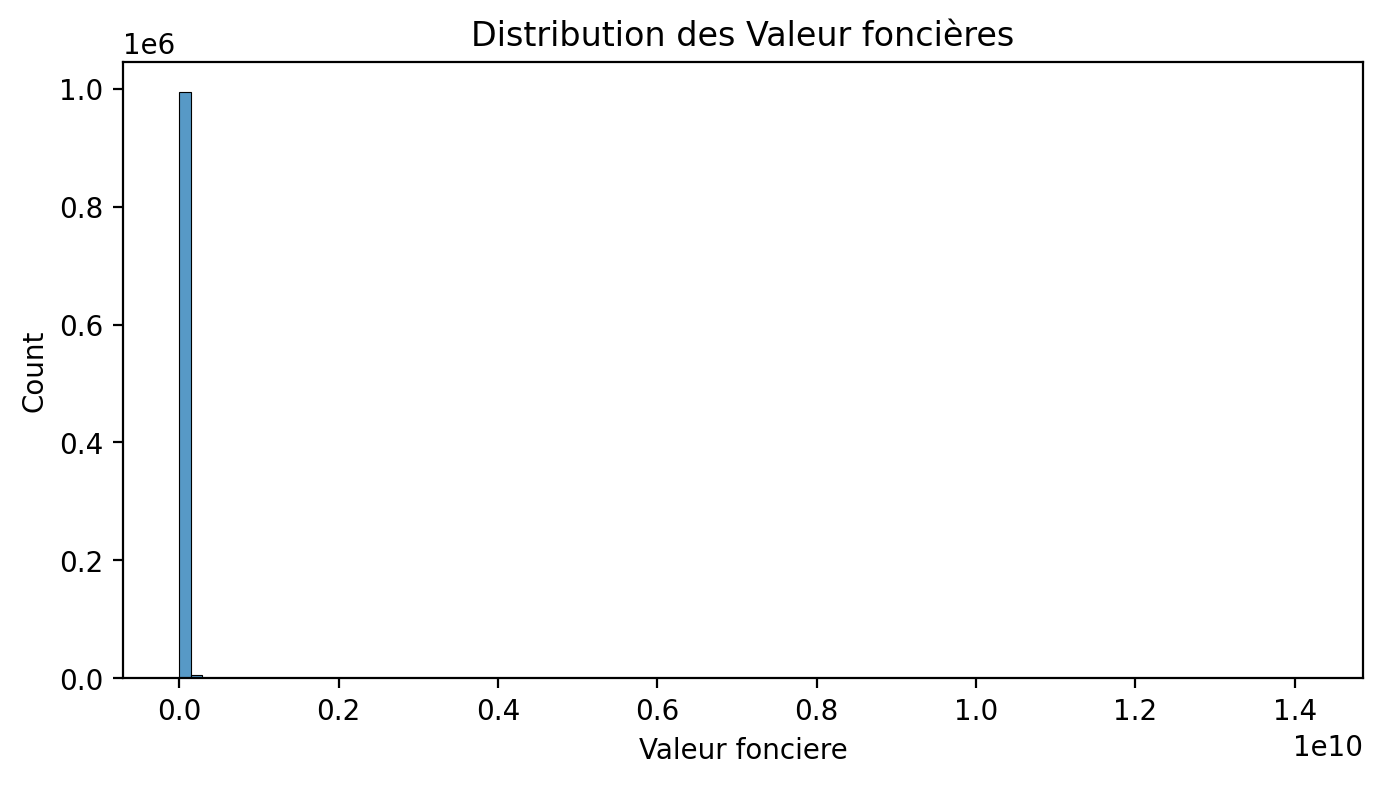

In [28]:
# Distribution of Prices
sns.histplot(sample, x="Valeur fonciere", bins=100)
plt.title("Distribution des Valeur foncières")

Text(0.5, 1.0, 'Valeurs foncières (sans les 10% les plus extrêmes)')

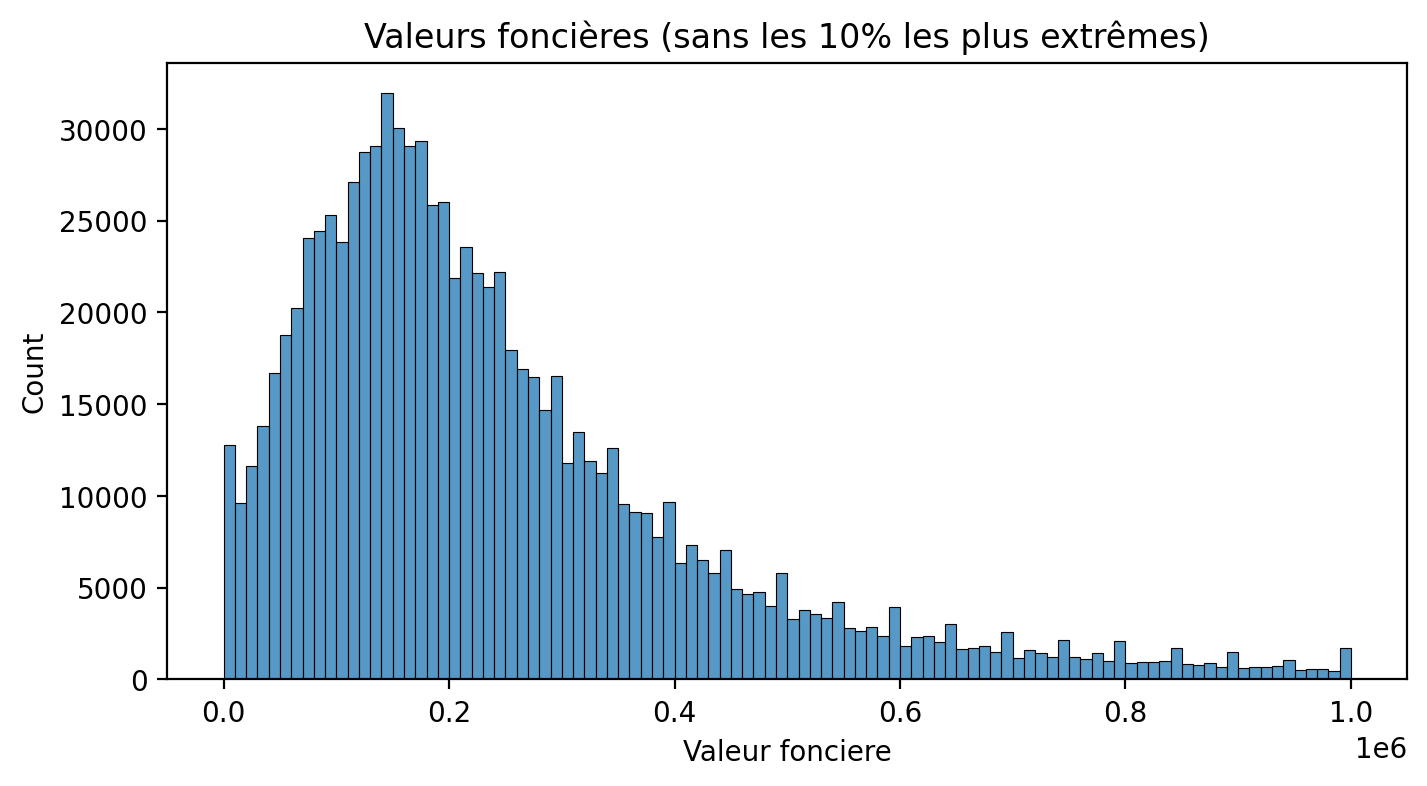

In [29]:
without_outliers = sample["Valeur fonciere"][sample["Valeur fonciere"].between(sample["Valeur fonciere"].quantile(0), sample["Valeur fonciere"].quantile(.9))] # without outliers
sns.histplot(without_outliers, bins=100)
plt.title("Valeurs foncières (sans les 10% les plus extrêmes)")

Text(0.5, 1.0, 'Valeur foncière moyenne (Mois glissant)')

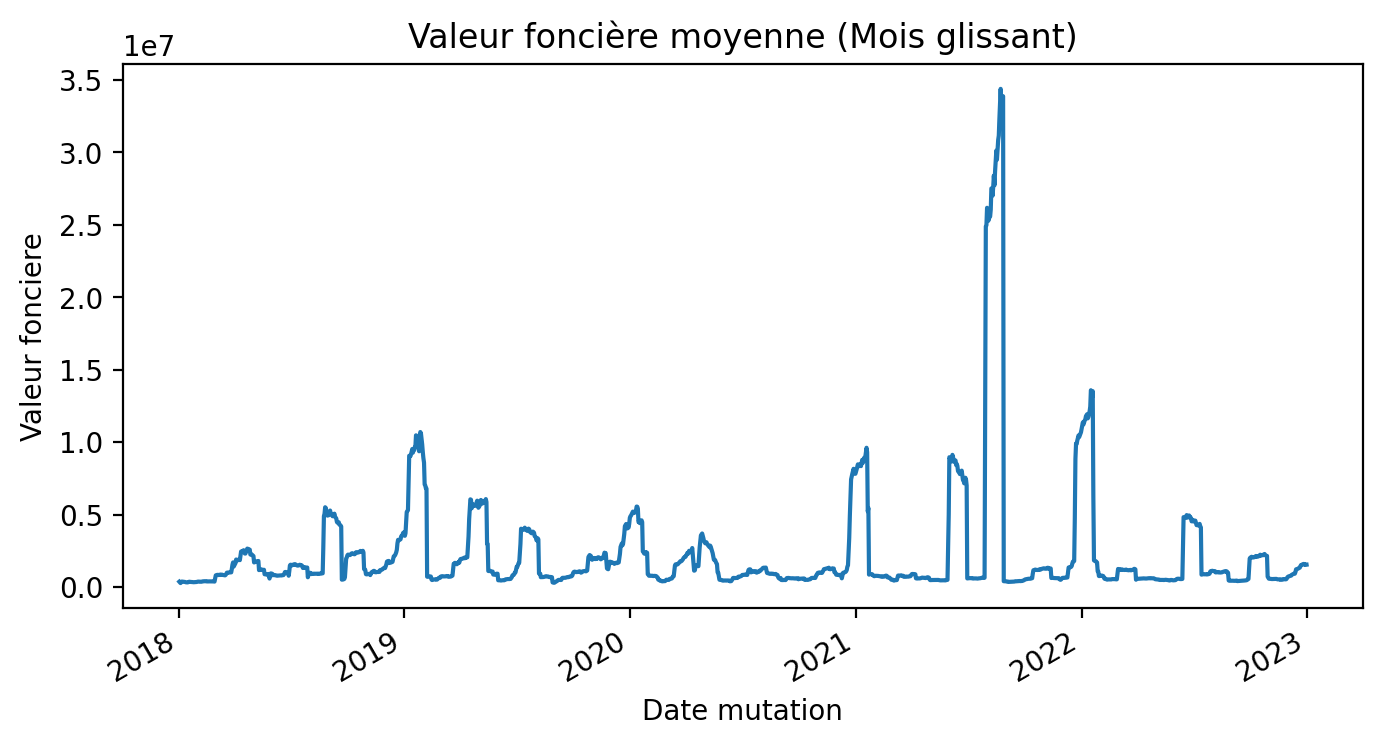

In [30]:
monthly_mean = sample["Valeur fonciere"].rolling("30d").mean().dropna()
sns.lineplot(x=monthly_mean.index, y=monthly_mean)
plt.gcf().autofmt_xdate()
plt.title("Valeur foncière moyenne (Mois glissant)")

Text(0.5, 1.0, 'Valeur foncière moyenne (Mois glissant & Sans les 10% les plus extrêmes)')

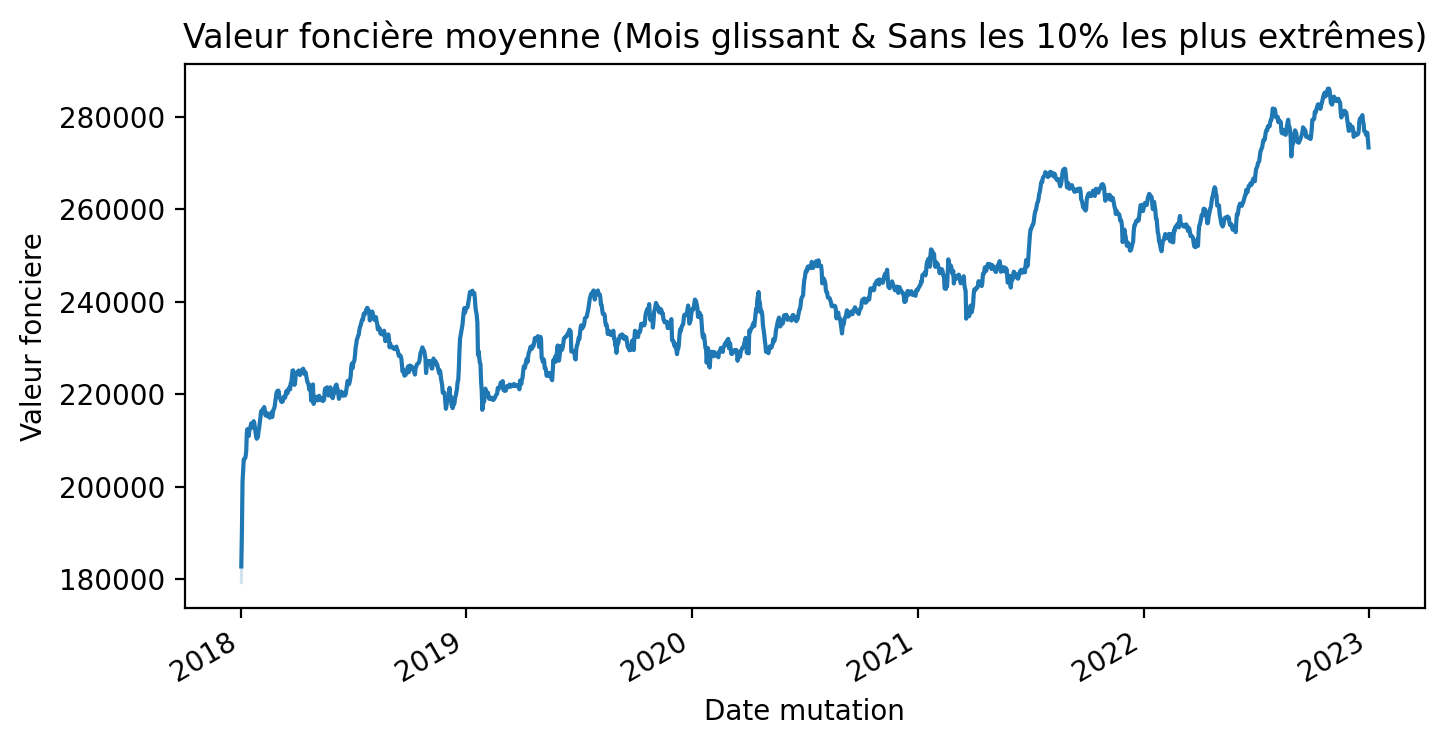

In [31]:
monthly_mean = without_outliers.rolling("30d").mean().dropna()
sns.lineplot(x=monthly_mean.index, y=monthly_mean)
plt.gcf().autofmt_xdate()
plt.title("Valeur foncière moyenne (Mois glissant & Sans les 10% les plus extrêmes)")

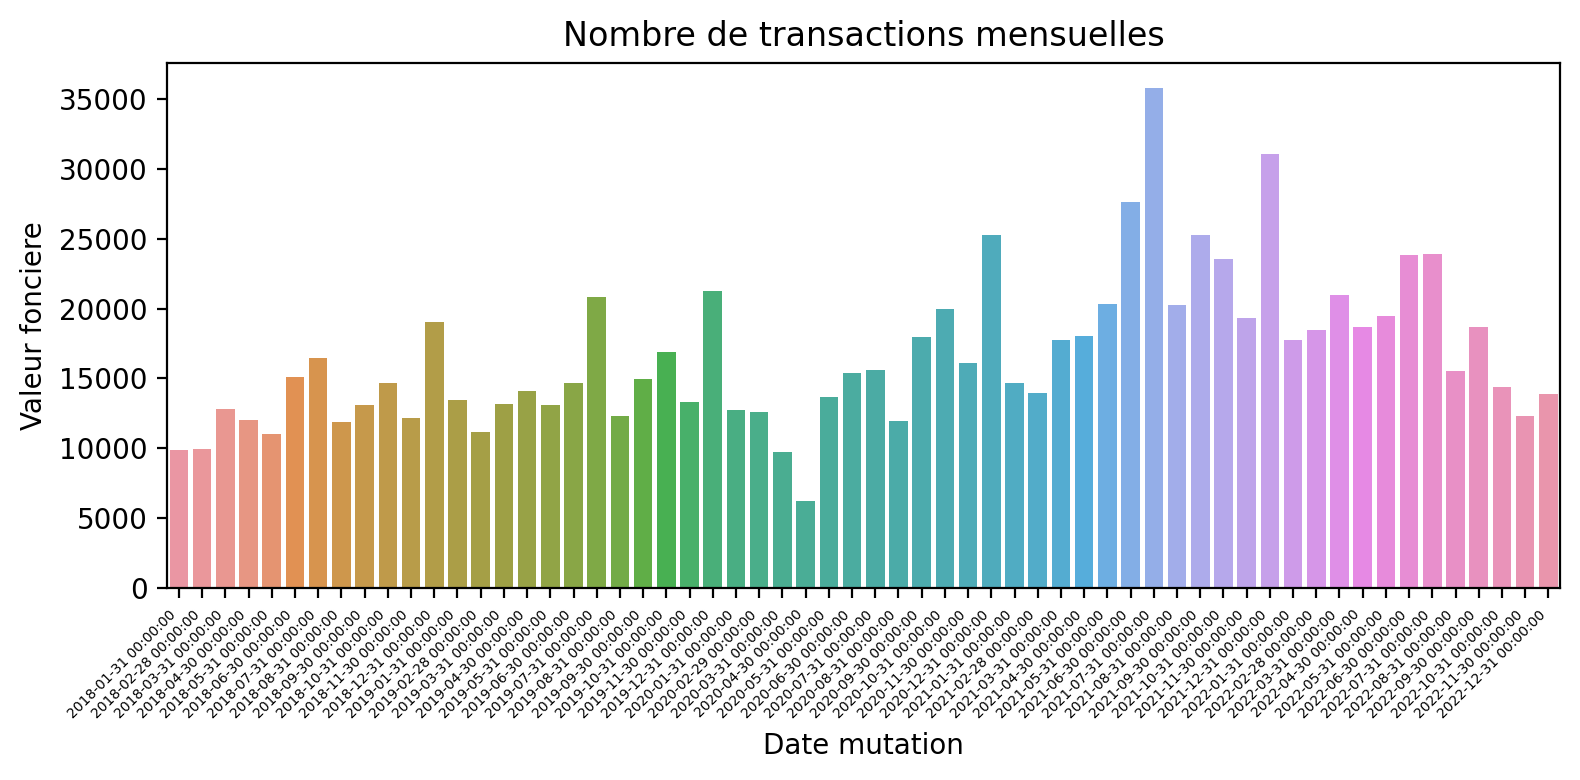

In [32]:
nbr_monthly_transactions = sample["Valeur fonciere"].resample("M").count()
sns.barplot(x=nbr_monthly_transactions.index, y=nbr_monthly_transactions)
plt.title("Nombre de transactions mensuelles")
plt.gcf().autofmt_xdate()
plt.xticks(rotation=45, fontsize=5)
plt.tight_layout()

/var/folders/fj/8pmdh2z120lbtvdmmc2407th0000gn/T/ipykernel_9953/1517842970.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  price_by_departement = sample.groupby(by="Code departement").mean()["Valeur fonciere"]


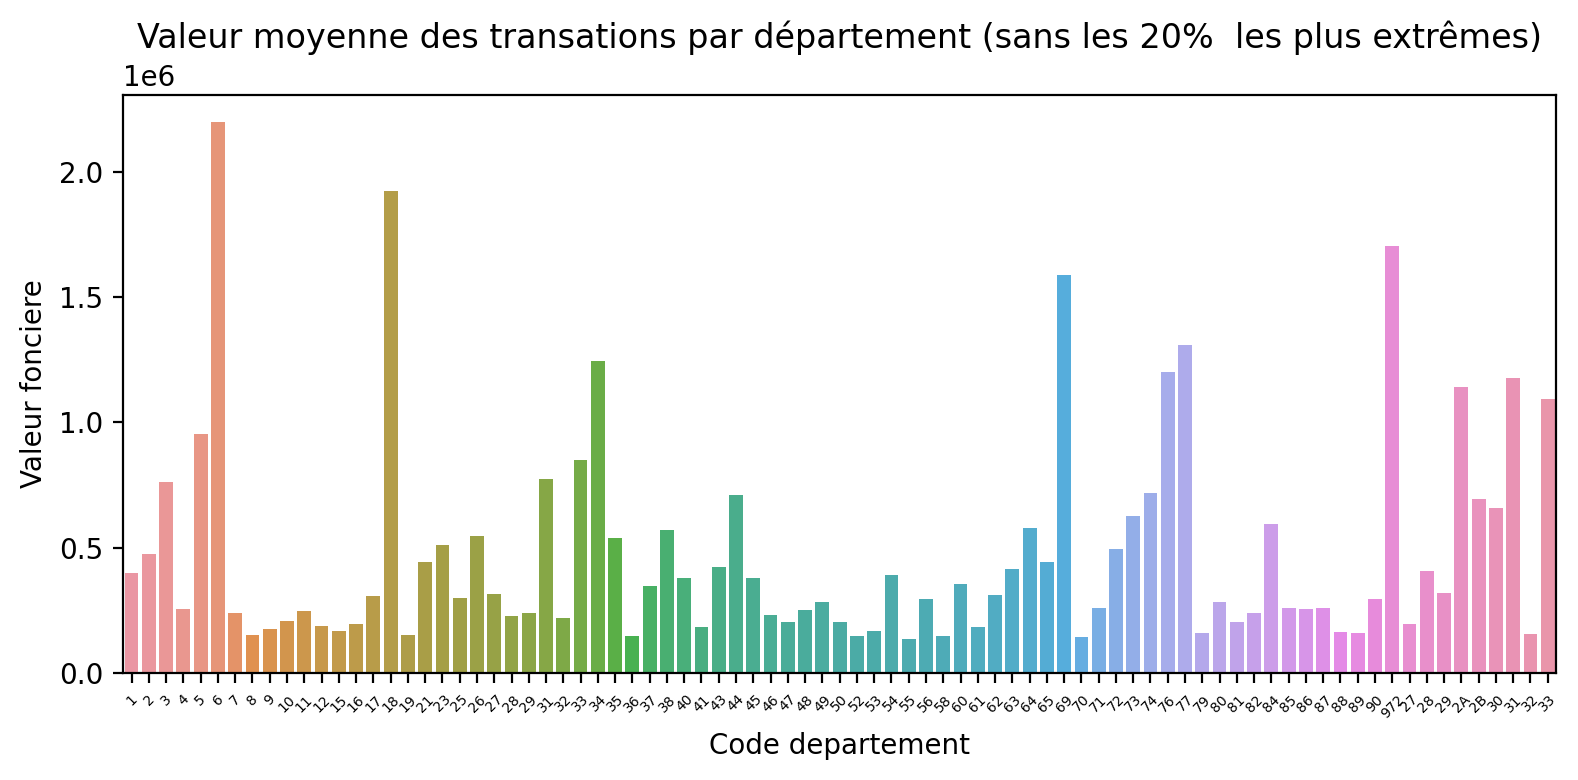

In [33]:
price_by_departement = sample.groupby(by="Code departement").mean()["Valeur fonciere"]
mask_80 = price_by_departement < price_by_departement.quantile(0.8)
sns.barplot(x=price_by_departement[mask_80].index, y=price_by_departement[mask_80])
plt.xticks(rotation=45, fontsize=5)
plt.title("Valeur moyenne des transations par département (sans les 20%  les plus extrêmes)")
plt.tight_layout()

Text(0.5, 1.0, 'Valeur moyenne des transations par département (20%  les plus extrêmes)')

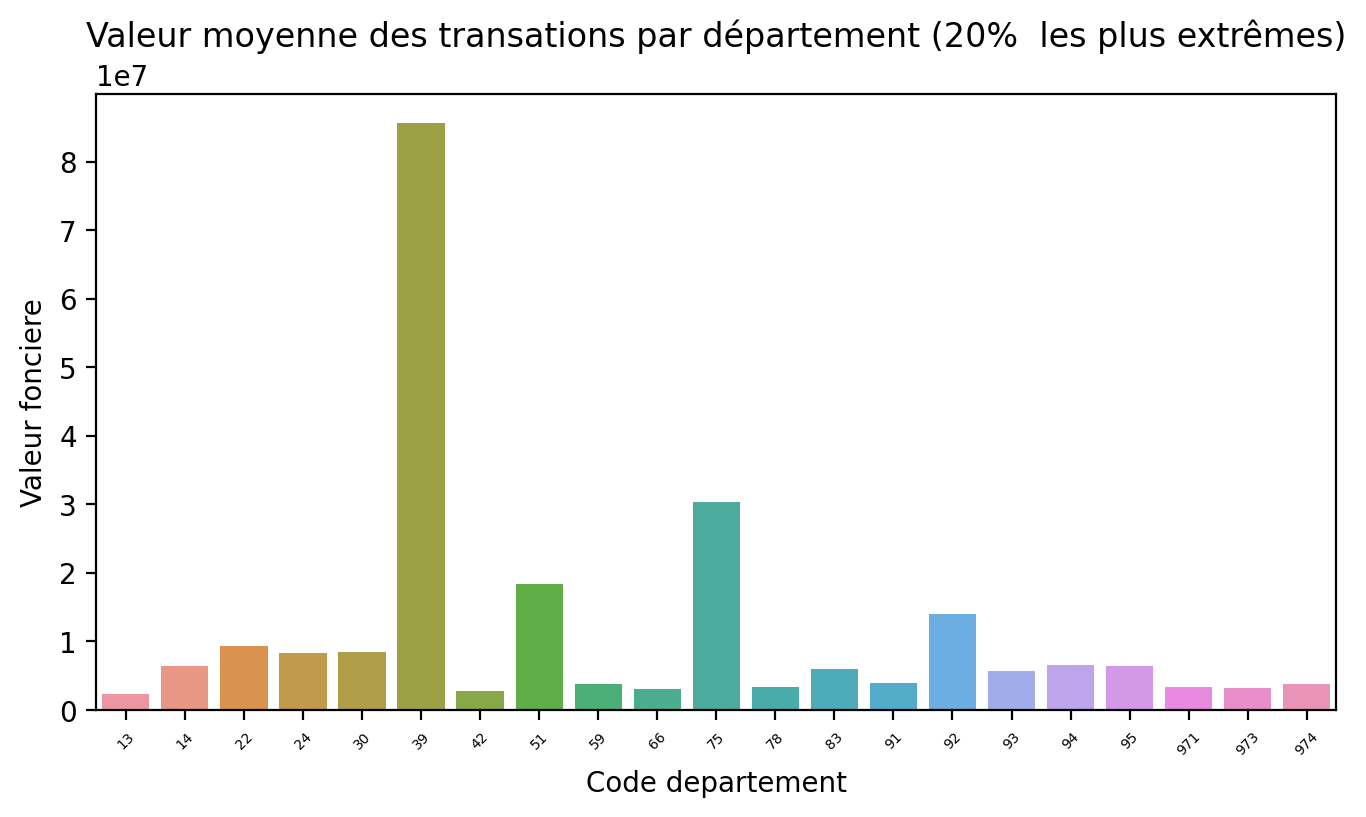

In [34]:
mask_20 = price_by_departement > price_by_departement.quantile(0.8)
sns.barplot(x=price_by_departement[mask_20].index, y=price_by_departement[mask_20])
plt.xticks(rotation=45, fontsize=5)
plt.title("Valeur moyenne des transations par département (20%  les plus extrêmes)")

<AxesSubplot: xlabel='Valeur fonciere', ylabel='regions'>

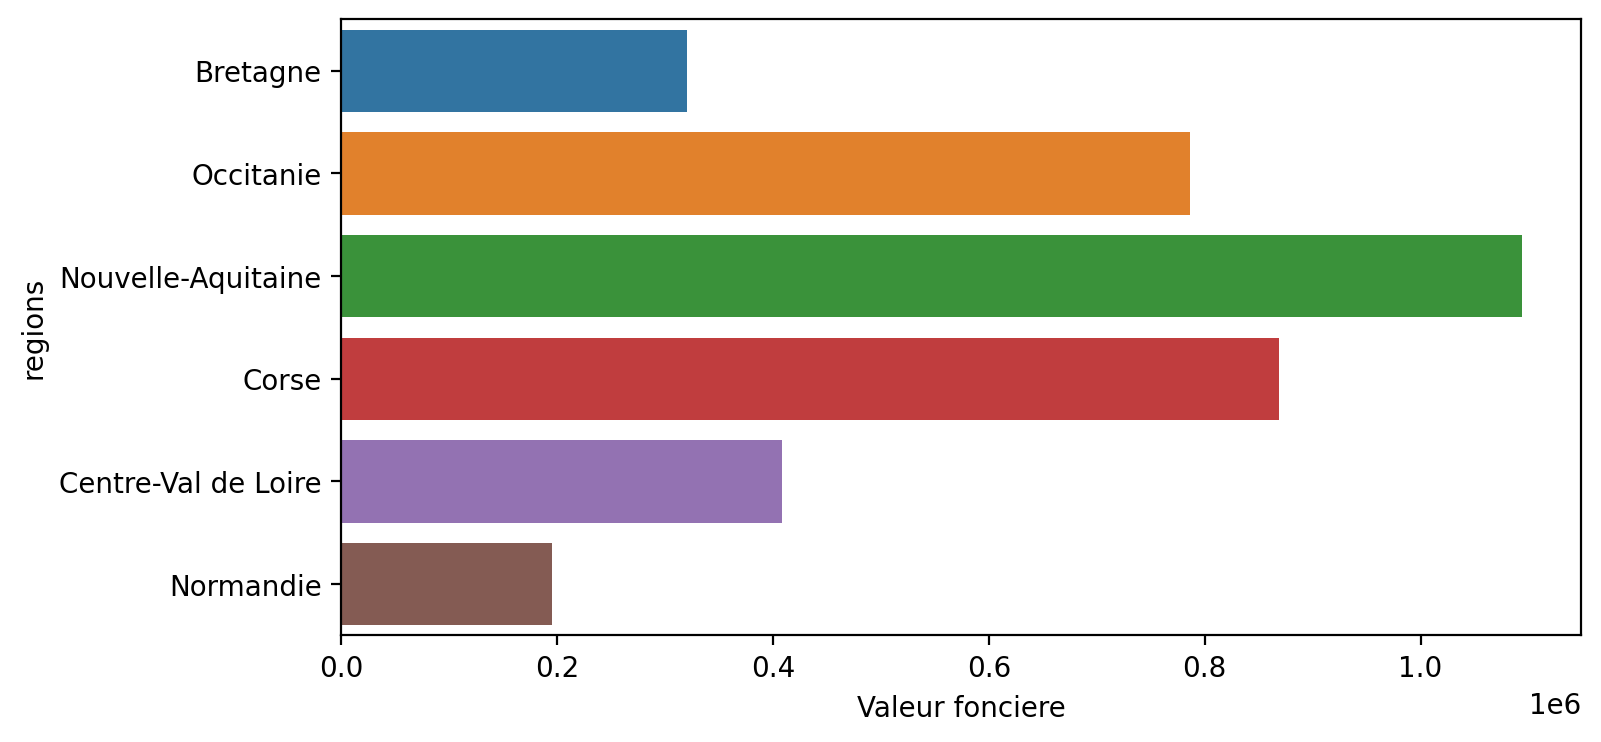

In [35]:
# Plot by regions
regions = {
    'Auvergne-Rhône-Alpes': ['01', '03', '07', '15', '26', '38', '42', '43', '63', '69', '73', '74'],
    'Bourgogne-Franche-Comté': ['21', '25', '39', '58', '70', '71', '89', '90'],
    'Bretagne': ['35', '22', '56', '29'],
    'Centre-Val de Loire': ['18', '28', '36', '37', '41', '45'],
    'Corse': ['2A', '2B'],
    'Grand Est': ['08', '10', '51', '52', '54', '55', '57', '67', '68', '88'],
    'Guadeloupe': ['971'],
    'Guyane': ['973'],
    'Hauts-de-France': ['02', '59', '60', '62', '80'],
    'Île-de-France': ['75', '77', '78', '91', '92', '93', '94', '95'],
    'La Réunion': ['974'],
    'Martinique': ['972'],
    'Normandie': ['14', '27', '50', '61', '76'],
    'Nouvelle-Aquitaine': ['16', '17', '19', '23', '24', '33', '40', '47', '64', '79', '86', '87'],
    'Occitanie': ['09', '11', '12', '30', '31', '32', '34', '46', '48', '65', '66', '81', '82'],
    'Pays de la Loire': ['44', '49', '53', '72', '85'],
    'Provence-Alpes-Côte d\'Azur': ['04', '05', '6', '13', '83', '84'],
}

def get_region(department_nbr: pd.Series):
    for region, departments in regions.items():
        if department_nbr in departments:
            return region
    return

sample["regions"] = [get_region(department_nbr) for department_nbr in sample['Code departement']]
sns.barplot(sample, x="Valeur fonciere", y="regions", errorbar=None)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133]),
 [Text(0, 0, 'CHE'),
  Text(1, 0, 'RTE'),
  Text(2, 0, 'CHEM'),
  Text(3, 0, 'RUE'),
  Text(4, 0, 'PL'),
  Text(5, 0, 'ALL'),
  Text(6, 0, 'AV'),
  Text(7, 0, 'VOIE'),
  Text(8, 0, 'IMP'),
  Text(9, 0, 'BD'),
  Text(10, 0, 'RPT'),
  Text(11

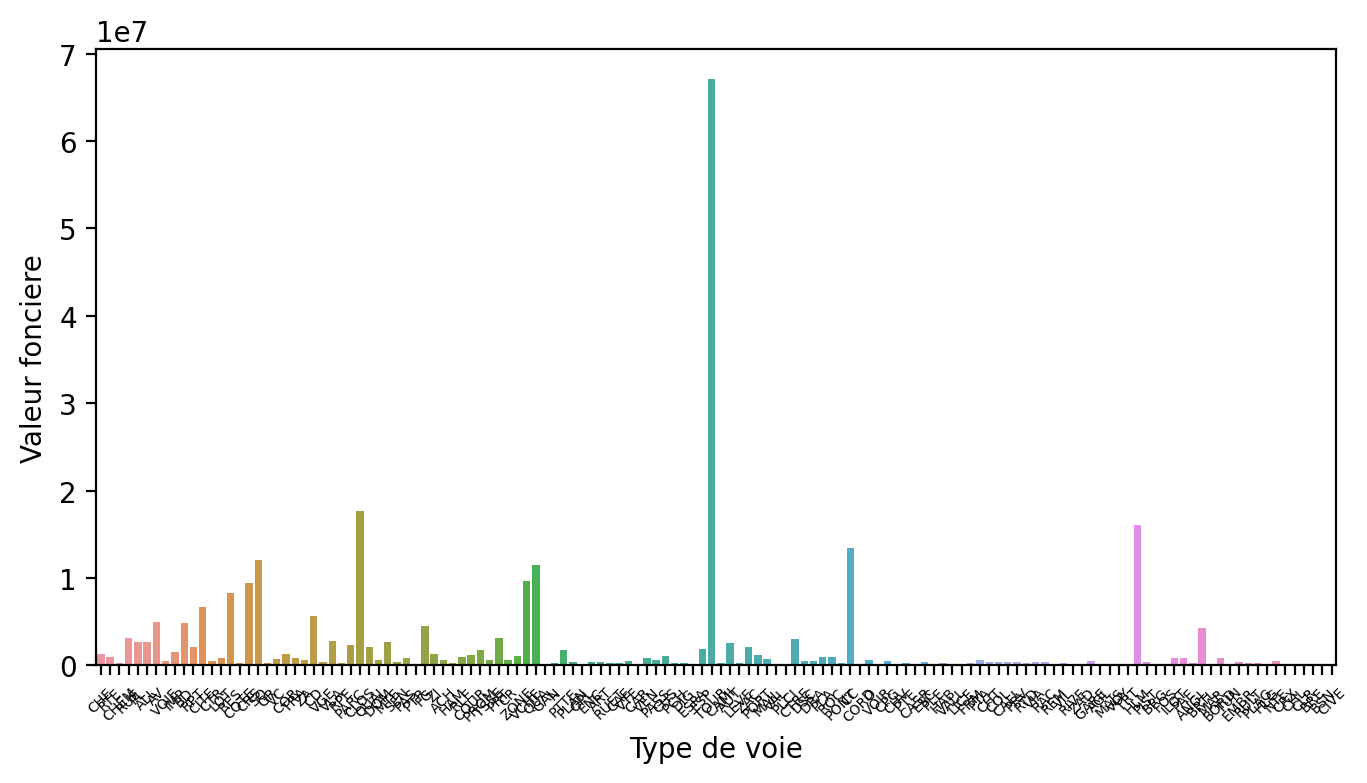

In [36]:
sns.barplot(sample, x="Type de voie", y="Valeur fonciere", errorbar=None)
plt.xticks(rotation=45, fontsize=5)

<AxesSubplot: xlabel='Valeur fonciere', ylabel='Code voie'>

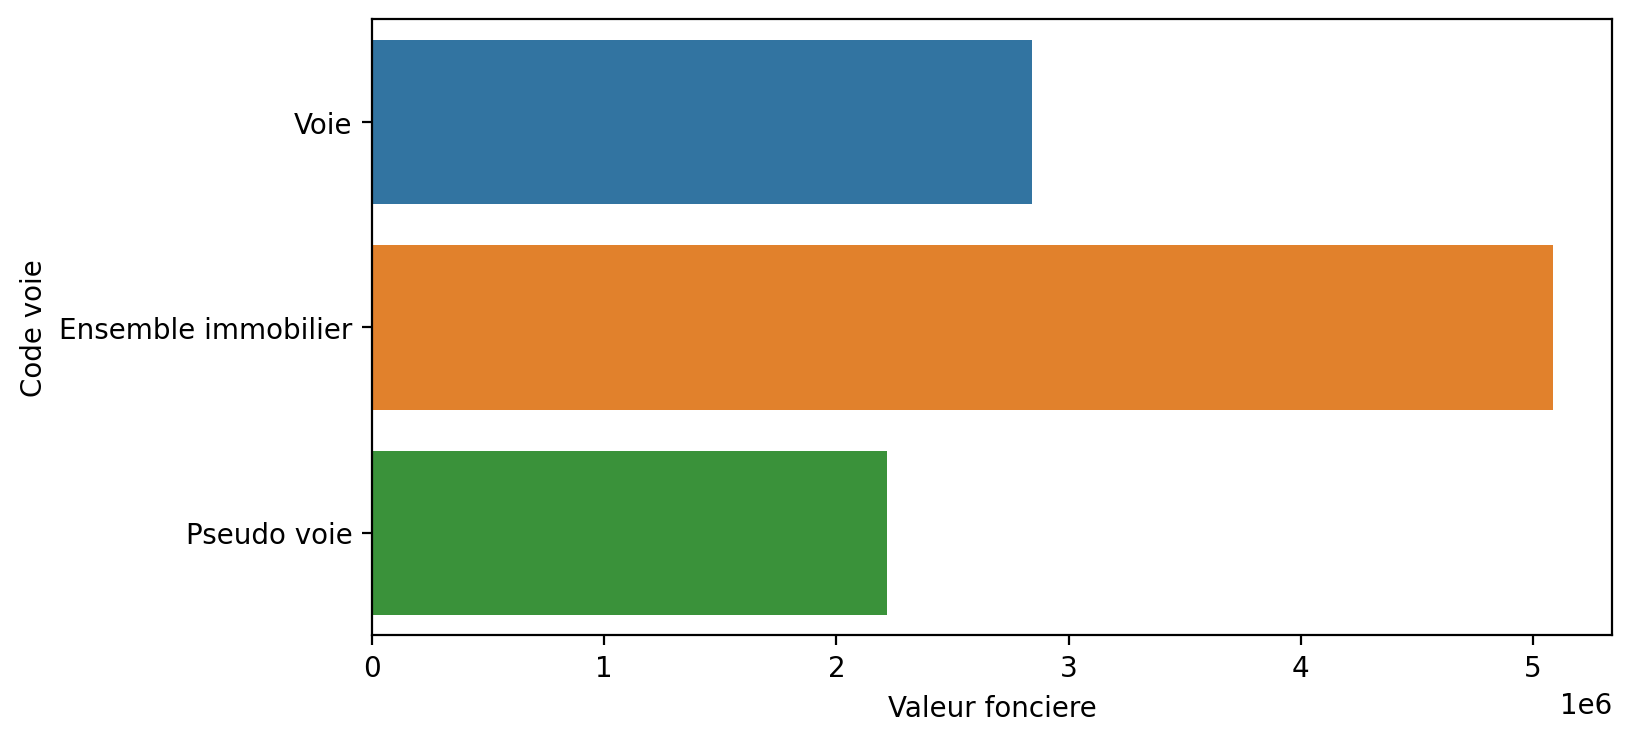

In [37]:
sns.barplot(sample, x="Valeur fonciere", y="Code voie", errorbar=None)

<AxesSubplot: xlabel='Valeur fonciere', ylabel='Type local'>

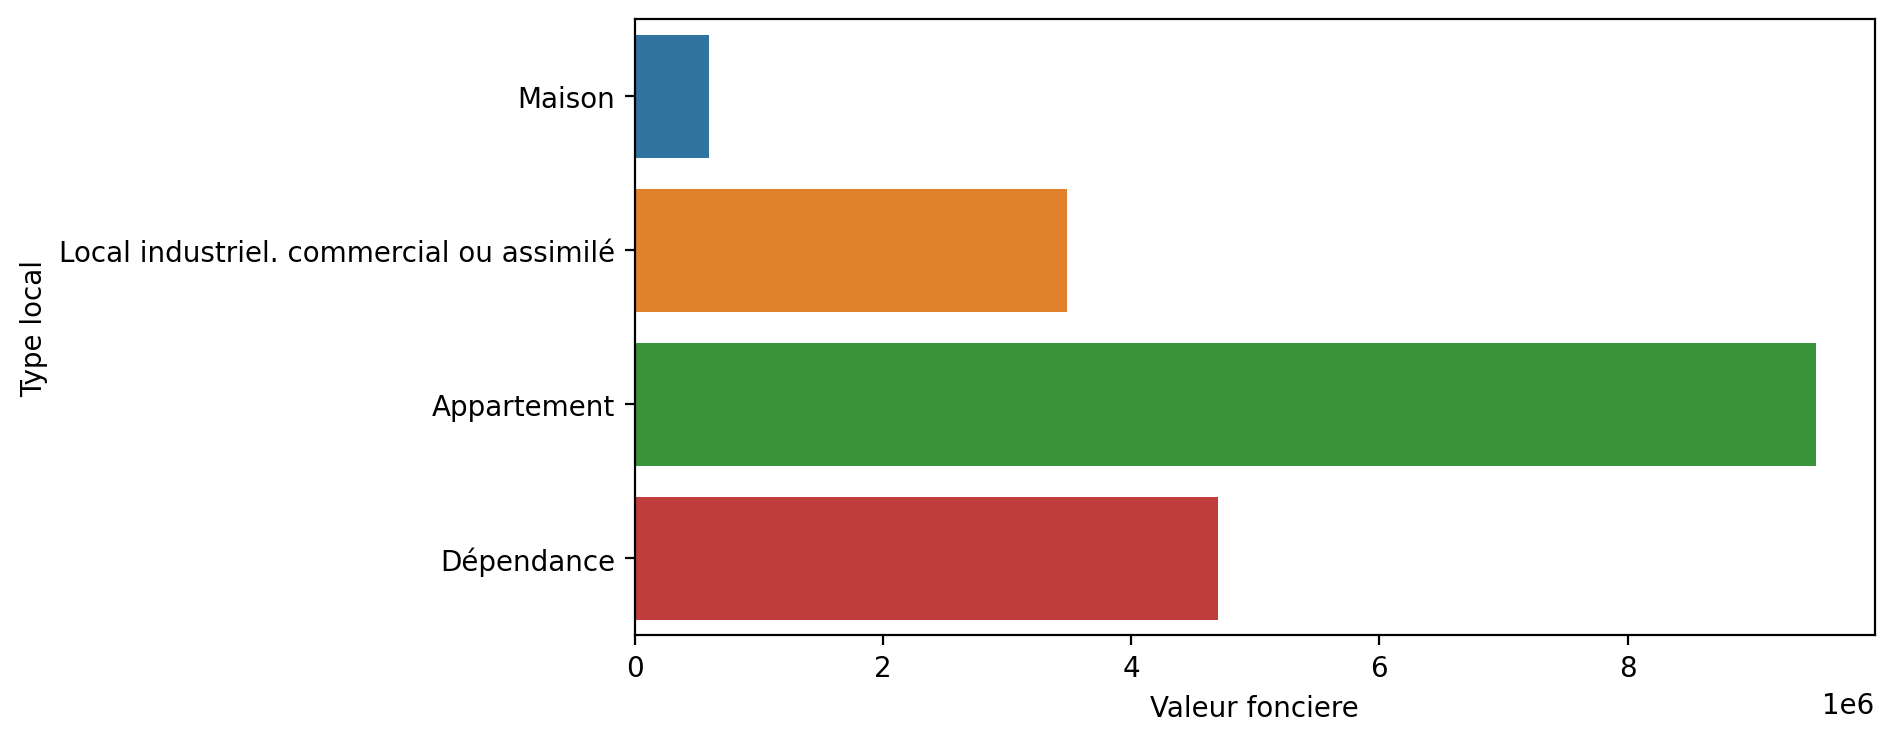

In [38]:
sns.barplot(sample, x="Valeur fonciere", y="Type local", errorbar=None)

In [39]:
def remove_outliers(serie: pd.Series) -> pd.Series:
    q1 = serie.quantile(0.01)
    q2 = serie.quantile(0.99)
    return serie.clip(q1, q2)

<AxesSubplot: xlabel='Valeur fonciere', ylabel='Surface reelle bati'>

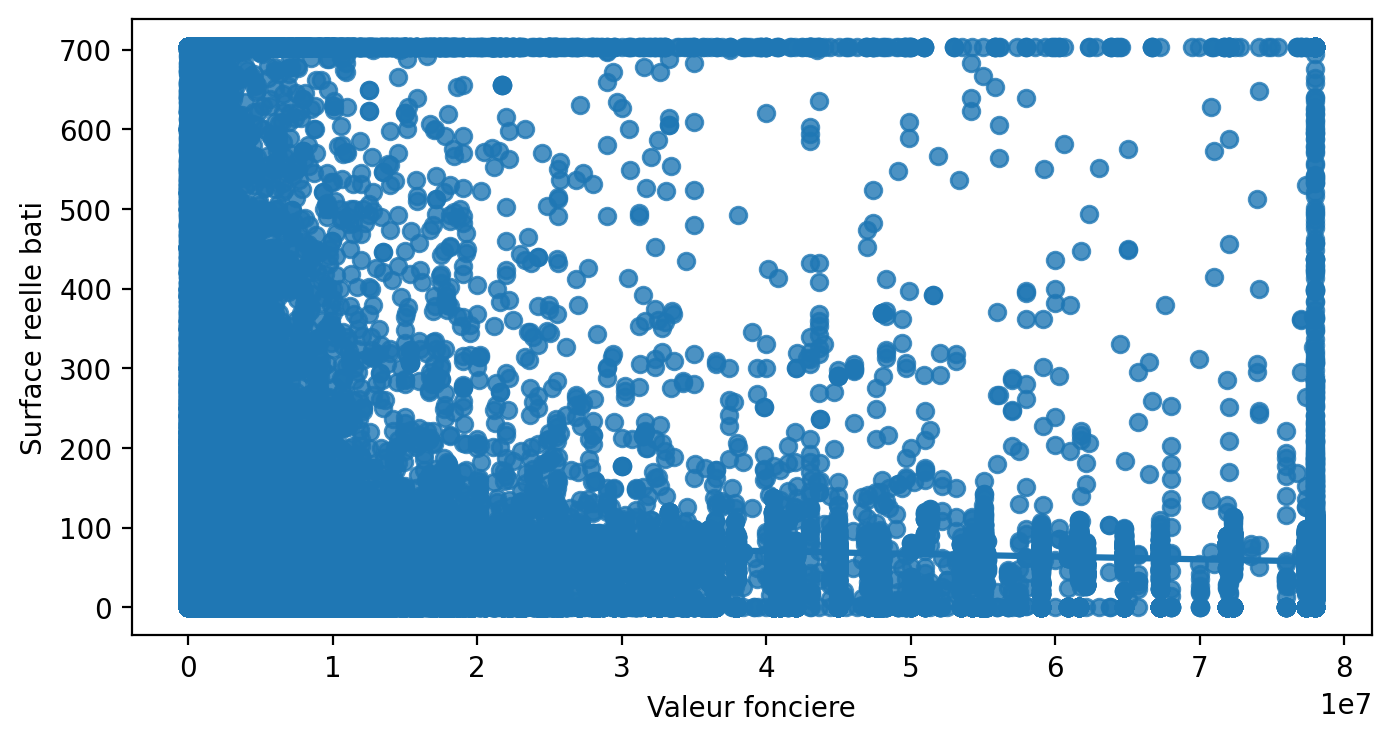

In [40]:
sns.regplot(x=remove_outliers(sample["Valeur fonciere"]), y=remove_outliers(sample["Surface reelle bati"]))

<AxesSubplot: xlabel='Valeur fonciere', ylabel='Surface terrain'>

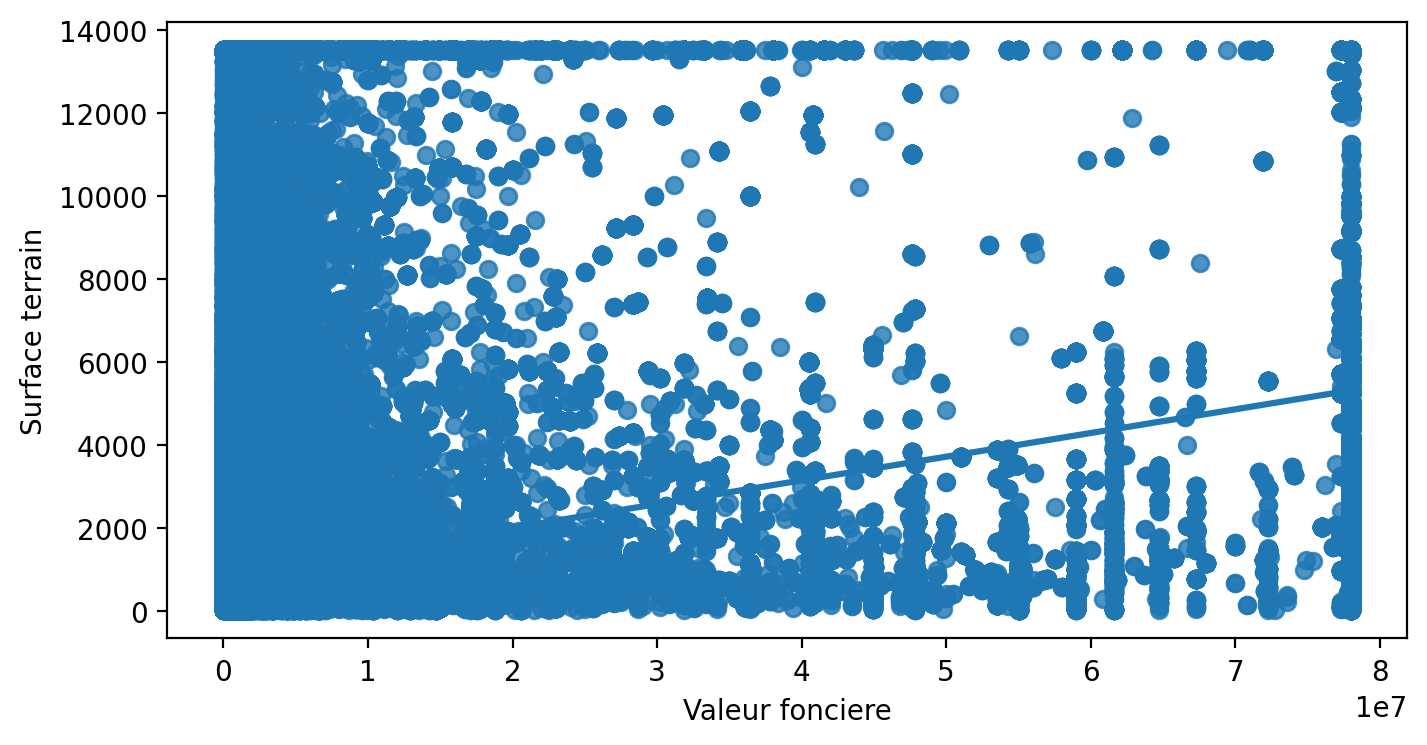

In [41]:
sns.regplot(x=remove_outliers(sample["Valeur fonciere"]), 
            y=remove_outliers(sample["Surface terrain"]))

<AxesSubplot: xlabel='Valeur fonciere', ylabel='Surface terrain'>

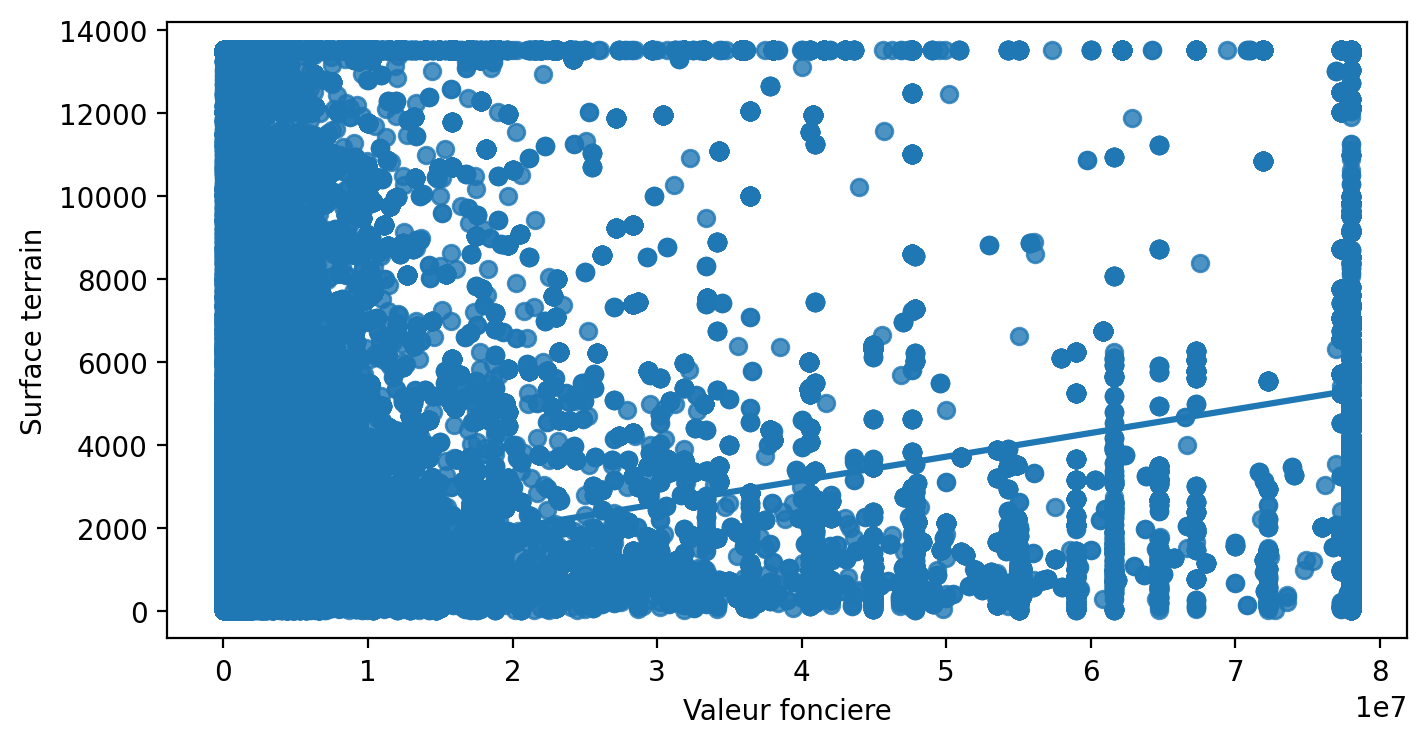

In [42]:
sns.regplot(x=remove_outliers(sample["Valeur fonciere"]), y=remove_outliers(sample["Surface terrain"]))

Text(0.5, 1.0, 'Prix au mètre carré')

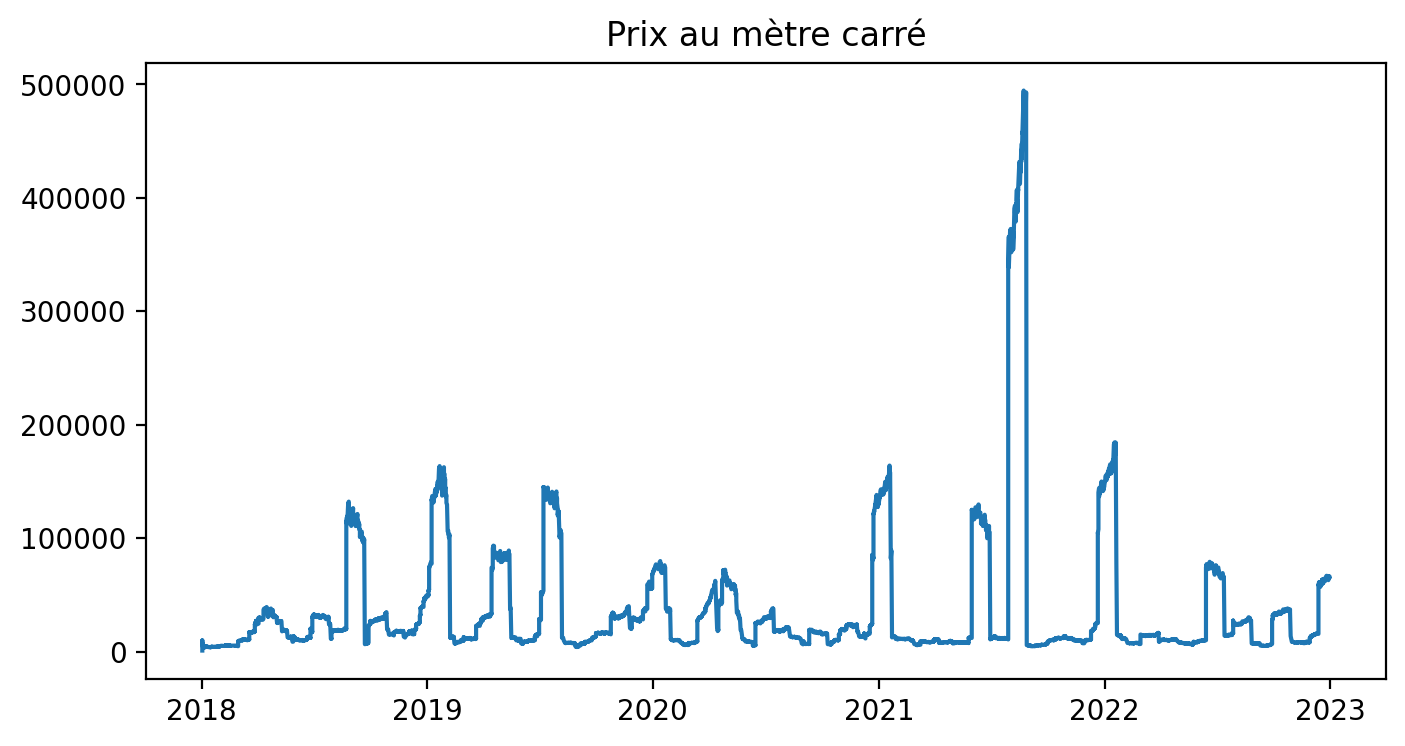

In [43]:
# Prix m carré
prix_metre_carre_mensuel = (sample["Valeur fonciere"] / sample['Surface reelle bati']).rolling("30d").mean()
plt.plot(prix_metre_carre_mensuel)
plt.title("Prix au mètre carré")